In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sentiment = pd.read_csv('data/fear_greed_index.csv')
trader = pd.read_csv('data/historical_data.csv')

# Rows and columns

In [4]:
print(sentiment.shape)
print(trader.shape)

(2644, 4)
(211224, 16)


# columns names

In [5]:
print(sentiment.columns)
print(trader.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


# first rows

In [8]:
print(sentiment.head(2))

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02


In [9]:
print(trader.head(2))

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  


# Data preprocessing (cleaning)

In [10]:
# null values
print("Sentiment missing:")
print(sentiment.isnull().sum())

Sentiment missing:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [11]:
print("Trader missing:")
print(trader.isnull().sum())

Trader missing:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [12]:
# remove duplicates
sentiment = sentiment.drop_duplicates()
trader = trader.drop_duplicates()

# Convert timestamps and align date

In [16]:
print(sentiment['date'])

0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object


In [19]:
trader['Timestamp IST']

0         02-12-2024 22:50
1         02-12-2024 22:50
2         02-12-2024 22:50
3         02-12-2024 22:50
4         02-12-2024 22:50
                ...       
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: Timestamp IST, Length: 211224, dtype: object

In [25]:
# convert Timestamp IST to datetime
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'],dayfirst=True)

# extract only date
trader['date'] = trader['Timestamp IST'].dt.date

# check
print(trader[['Timestamp IST','date']].head())

        Timestamp IST        date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02


In [27]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

print(sentiment.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [28]:
sentiment = sentiment.rename(columns={'classification':'sentiment'})

# merge datasets

In [30]:
merged = pd.merge(trader,sentiment,on='date',how="inner")

print(merged.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

In [32]:
merged.groupby('sentiment')['Closed PnL'].mean()

sentiment
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

# daily PnL per trader (or per account)

In [33]:
daily_pnl_per_trader = merged.groupby(['Account','date'])['Closed PnL']
print(daily_pnl_per_trader.head())

0           0.0000
1           0.0000
2           0.0000
3           0.0000
4           0.0000
            ...   
211196   -189.3637
211197   -179.6541
211198   -165.0049
211199    -24.6026
211200   -193.1585
Name: Closed PnL, Length: 10779, dtype: float64


# Win rate

In [34]:
merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('sentiment')['win'].mean()

print(win_rate)

sentiment
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


# Average trade size

In [35]:
avg_trade_size = merged.groupby('sentiment')['Size USD'].mean()

print(avg_trade_size)

sentiment
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


# Number of trades per day

In [36]:
trades_per_day = merged.groupby('date').size().reset_index(name='trade_count')

print(trades_per_day.head())

         date  trade_count
0  2023-05-01            3
1  2023-12-05            9
2  2023-12-14           11
3  2023-12-15            2
4  2023-12-16            3


# Long / Short ratio

In [37]:
long_short_ratio = merged['Side'].value_counts()

print(long_short_ratio)

Side
SELL    108528
BUY     102690
Name: count, dtype: int64


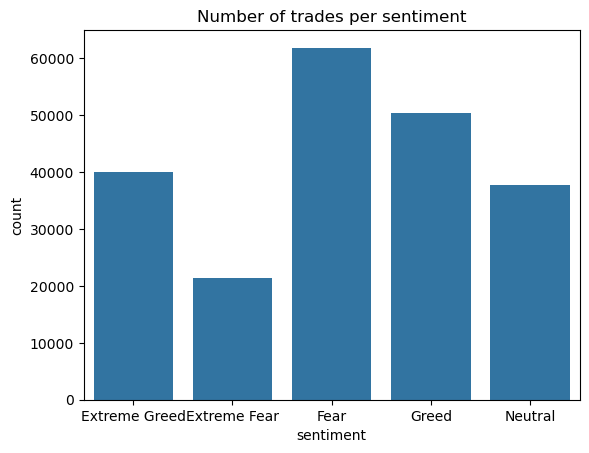

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=merged)
plt.title("Number of trades per sentiment")
plt.show()

# Part B

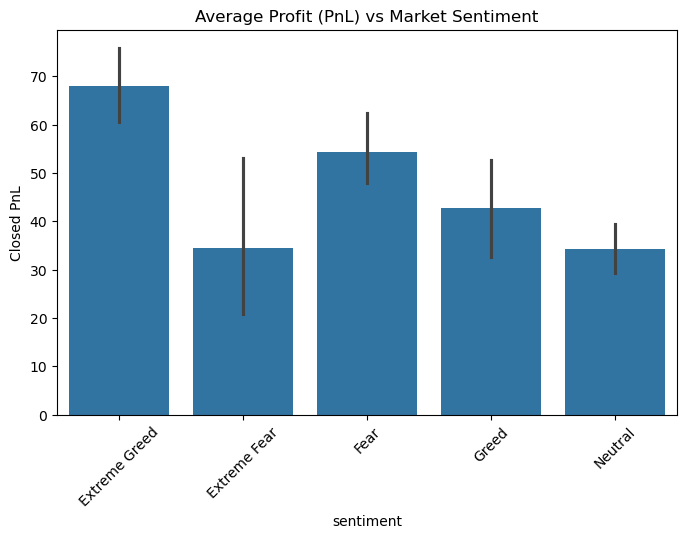

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.barplot(x='sentiment', y='Closed PnL', data=merged)

plt.title("Average Profit (PnL) vs Market Sentiment")
plt.xticks(rotation=45)
plt.show()

## Trader profitability is highest during Extreme Greed sentiment and lowest during Neutral and Extreme Fear sentiment. This indicates that traders perform better during bullish market conditions.

 # Win rate comparison

merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('sentiment')['win'].mean()

print(win_rate)

win_rate.plot(kind='bar')
plt.title("Win Rate vs Sentiment")
plt.show()

## Win rate is higher during Extreme Greed compared to Fear conditions.

# Check trader behavior change

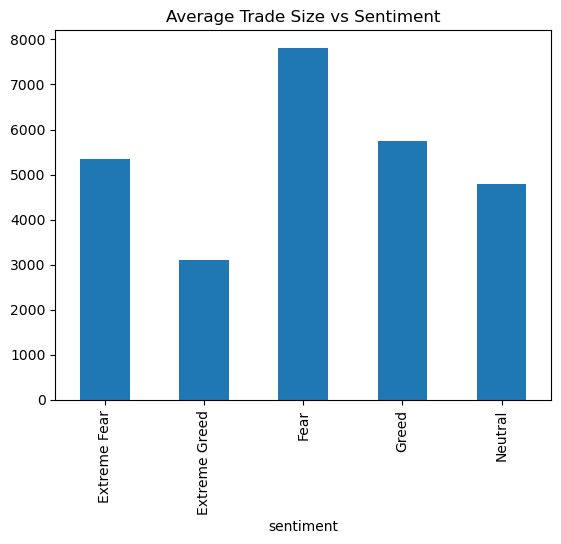

In [42]:
merged.groupby('sentiment')['Size USD'].mean().plot(kind='bar')

plt.title("Average Trade Size vs Sentiment")
plt.show()

## Trading activity is highest during Fear and Greed sentiment periods, suggesting that traders become more active during volatile market conditions. This may be due to increased opportunities or emotional trading behavior.

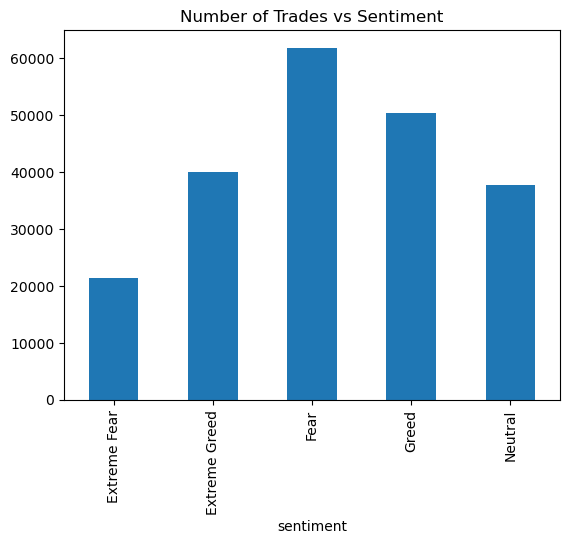

In [43]:
merged.groupby('sentiment').size().plot(kind='bar')

plt.title("Number of Trades vs Sentiment")
plt.show()


## Average trade size is highest during Fear sentiment, indicating that traders take larger positions during uncertain market conditions, possibly expecting market reversals or taking advantage of volatility.

# Identify segments

In [44]:
median_size = merged['Size USD'].median()

merged['trader_segment'] = merged['Size USD'].apply(
    lambda x: "High Size Trader" if x > median_size else "Low Size Trader"
)

segment_analysis = merged.groupby(['sentiment','trader_segment'])['Closed PnL'].mean()

print(segment_analysis)


sentiment      trader_segment  
Extreme Fear   High Size Trader     61.196379
               Low Size Trader       1.157202
Extreme Greed  High Size Trader    140.570044
               Low Size Trader       9.628661
Fear           High Size Trader     97.025581
               Low Size Trader       3.580906
Greed          High Size Trader     84.301244
               Low Size Trader       3.609685
Neutral        High Size Trader     69.581271
               Low Size Trader       2.188668
Name: Closed PnL, dtype: float64


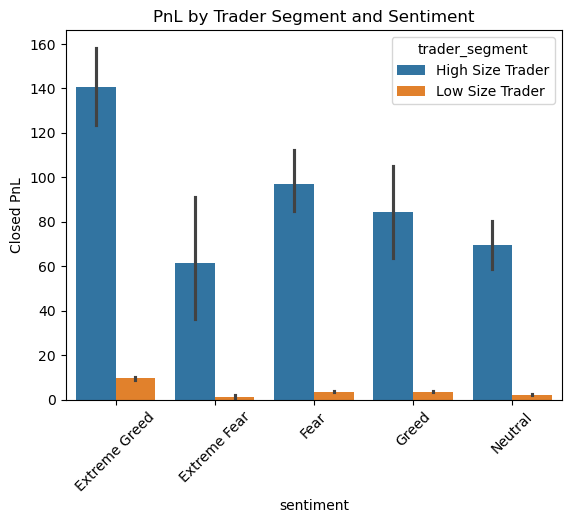

In [45]:
sns.barplot(x='sentiment', y='Closed PnL', hue='trader_segment', data=merged)

plt.title("PnL by Trader Segment and Sentiment")
plt.xticks(rotation=45)
plt.show()


# Part C

## Strategy 1: Increase trading activity during Extreme Greed sentiment, as trader profitability is highest in this condition. Traders can take advantage of bullish market momentum to maximize profits. Moderate to high position sizes can be used during Extreme Greed periods, as market conditions are favorable.

## Strategy 2: Reduce trade size and adopt a cautious trading approach during Extreme Fear and Neutral sentiment, as profitability is lower and market uncertainty is higher. Traders should avoid large positions and focus on risk management during these periods.


# predictive model

In [46]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [48]:
df = merged.copy()

In [49]:
df['profit_label'] = df['Closed PnL'].apply(lambda x: 1 if x>0 else 0)

le = LabelEncoder()

df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

X = df[['sentiment_encoded','Size USD']]

y = df['profit_label']

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# create model
model = RandomForestClassifier()

# train
model.fit(X_train,y_train)

# predict
pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test,pred)

print("Model accuracy:", accuracy)


Model accuracy: 0.615116939683742


## A Random Forest model was trained to predict trade profitability using sentiment and trade size. The model achieved an accuracy of 61%, indicating that market sentiment and trade size are useful predictors of trader profitability.

# Trader Clustering

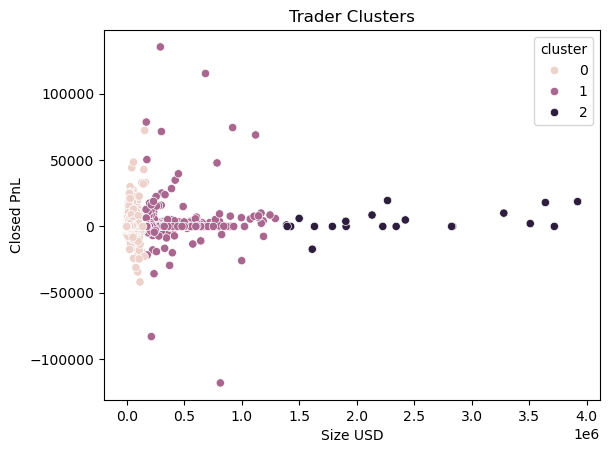

In [51]:
from sklearn.cluster import KMeans

X = merged[['Size USD','Closed PnL']]

kmeans = KMeans(n_clusters=3)

merged['cluster'] = kmeans.fit_predict(X)

import seaborn as sns

sns.scatterplot(x='Size USD', y='Closed PnL', hue='cluster', data=merged)

plt.title("Trader Clusters")
plt.show()